In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rc('font', family='NanumBarunGothic')

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종30대.pkl')

In [6]:
# 사용하지 않을 변수 제거
df.drop(['카드_총_이용금액', '카드_총_이용건수', '카드_평일_이용건수','카드_여행사_이용건수'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      143 non-null    object 
 1   농촌마을_수        143 non-null    int64  
 2   농촌마을_체험_평균등급  143 non-null    float64
 3   농촌마을_교육_평균등급  143 non-null    float64
 4   농촌마을_숙박_평균등급  143 non-null    float64
 5   농촌마을_음식_평균등급  143 non-null    float64
 6   농촌마을_으뜸촌_선정수  143 non-null    int64  
 7   카드_관광쇼핑_이용건수  120 non-null    float64
 8   카드_교통_이용건수    114 non-null    float64
 9   카드_숙박_이용건수    142 non-null    float64
 10  카드_체험_이용건수    142 non-null    float64
 11  카드_주말_이용건수    142 non-null    float64
 12  자연경관          142 non-null    float64
 13  문화유산          133 non-null    float64
 14  교통            142 non-null    float64
 15  숙박시설          125 non-null    float64
 16  식당및음식         142 non-null    float64
 17  쇼핑            134 non-null    float64
 18  관광지편의시설       141 non-null    

#### 결측치 처리

In [8]:
# 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    23
카드_교통_이용건수      29
카드_숙박_이용건수       1
카드_체험_이용건수       1
카드_주말_이용건수       1
자연경관             1
문화유산            10
교통               1
숙박시설            18
식당및음식            1
쇼핑               9
관광지편의시설          2
관광종사자의친절성        2
체험프로그램           9
관광지물가            2
관광지혼잡도           2
재방문의도            1
타인추천의도           1
평균인당비용           1
여행객수             1
dtype: int64

In [9]:
# 뒤 부분 모두 null인 데이터 => 우선 제거하기
df[df['여행객수'].isnull()]

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
66,경북 울주군,1,3.0,1.996,3.0,1.824,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop(df[df['여행객수'].isnull()].index, axis=0).reset_index(drop=True)

In [11]:
# 다시 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    22
카드_교통_이용건수      28
카드_숙박_이용건수       0
카드_체험_이용건수       0
카드_주말_이용건수       0
자연경관             0
문화유산             9
교통               0
숙박시설            17
식당및음식            0
쇼핑               8
관광지편의시설          1
관광종사자의친절성        1
체험프로그램           8
관광지물가            1
관광지혼잡도           1
재방문의도            0
타인추천의도           0
평균인당비용           0
여행객수             0
dtype: int64

In [12]:
# 이용건수는 0으로
for i in range(12):
  df.iloc[:, i] = df.iloc[:, i].fillna(0)

In [13]:
# 만족도는 평균값으로
for i in range(12, 26):
  df.iloc[:, i] = df.iloc[:, i].fillna(df.iloc[:, i].mean())

#### 변수별 분포 확인

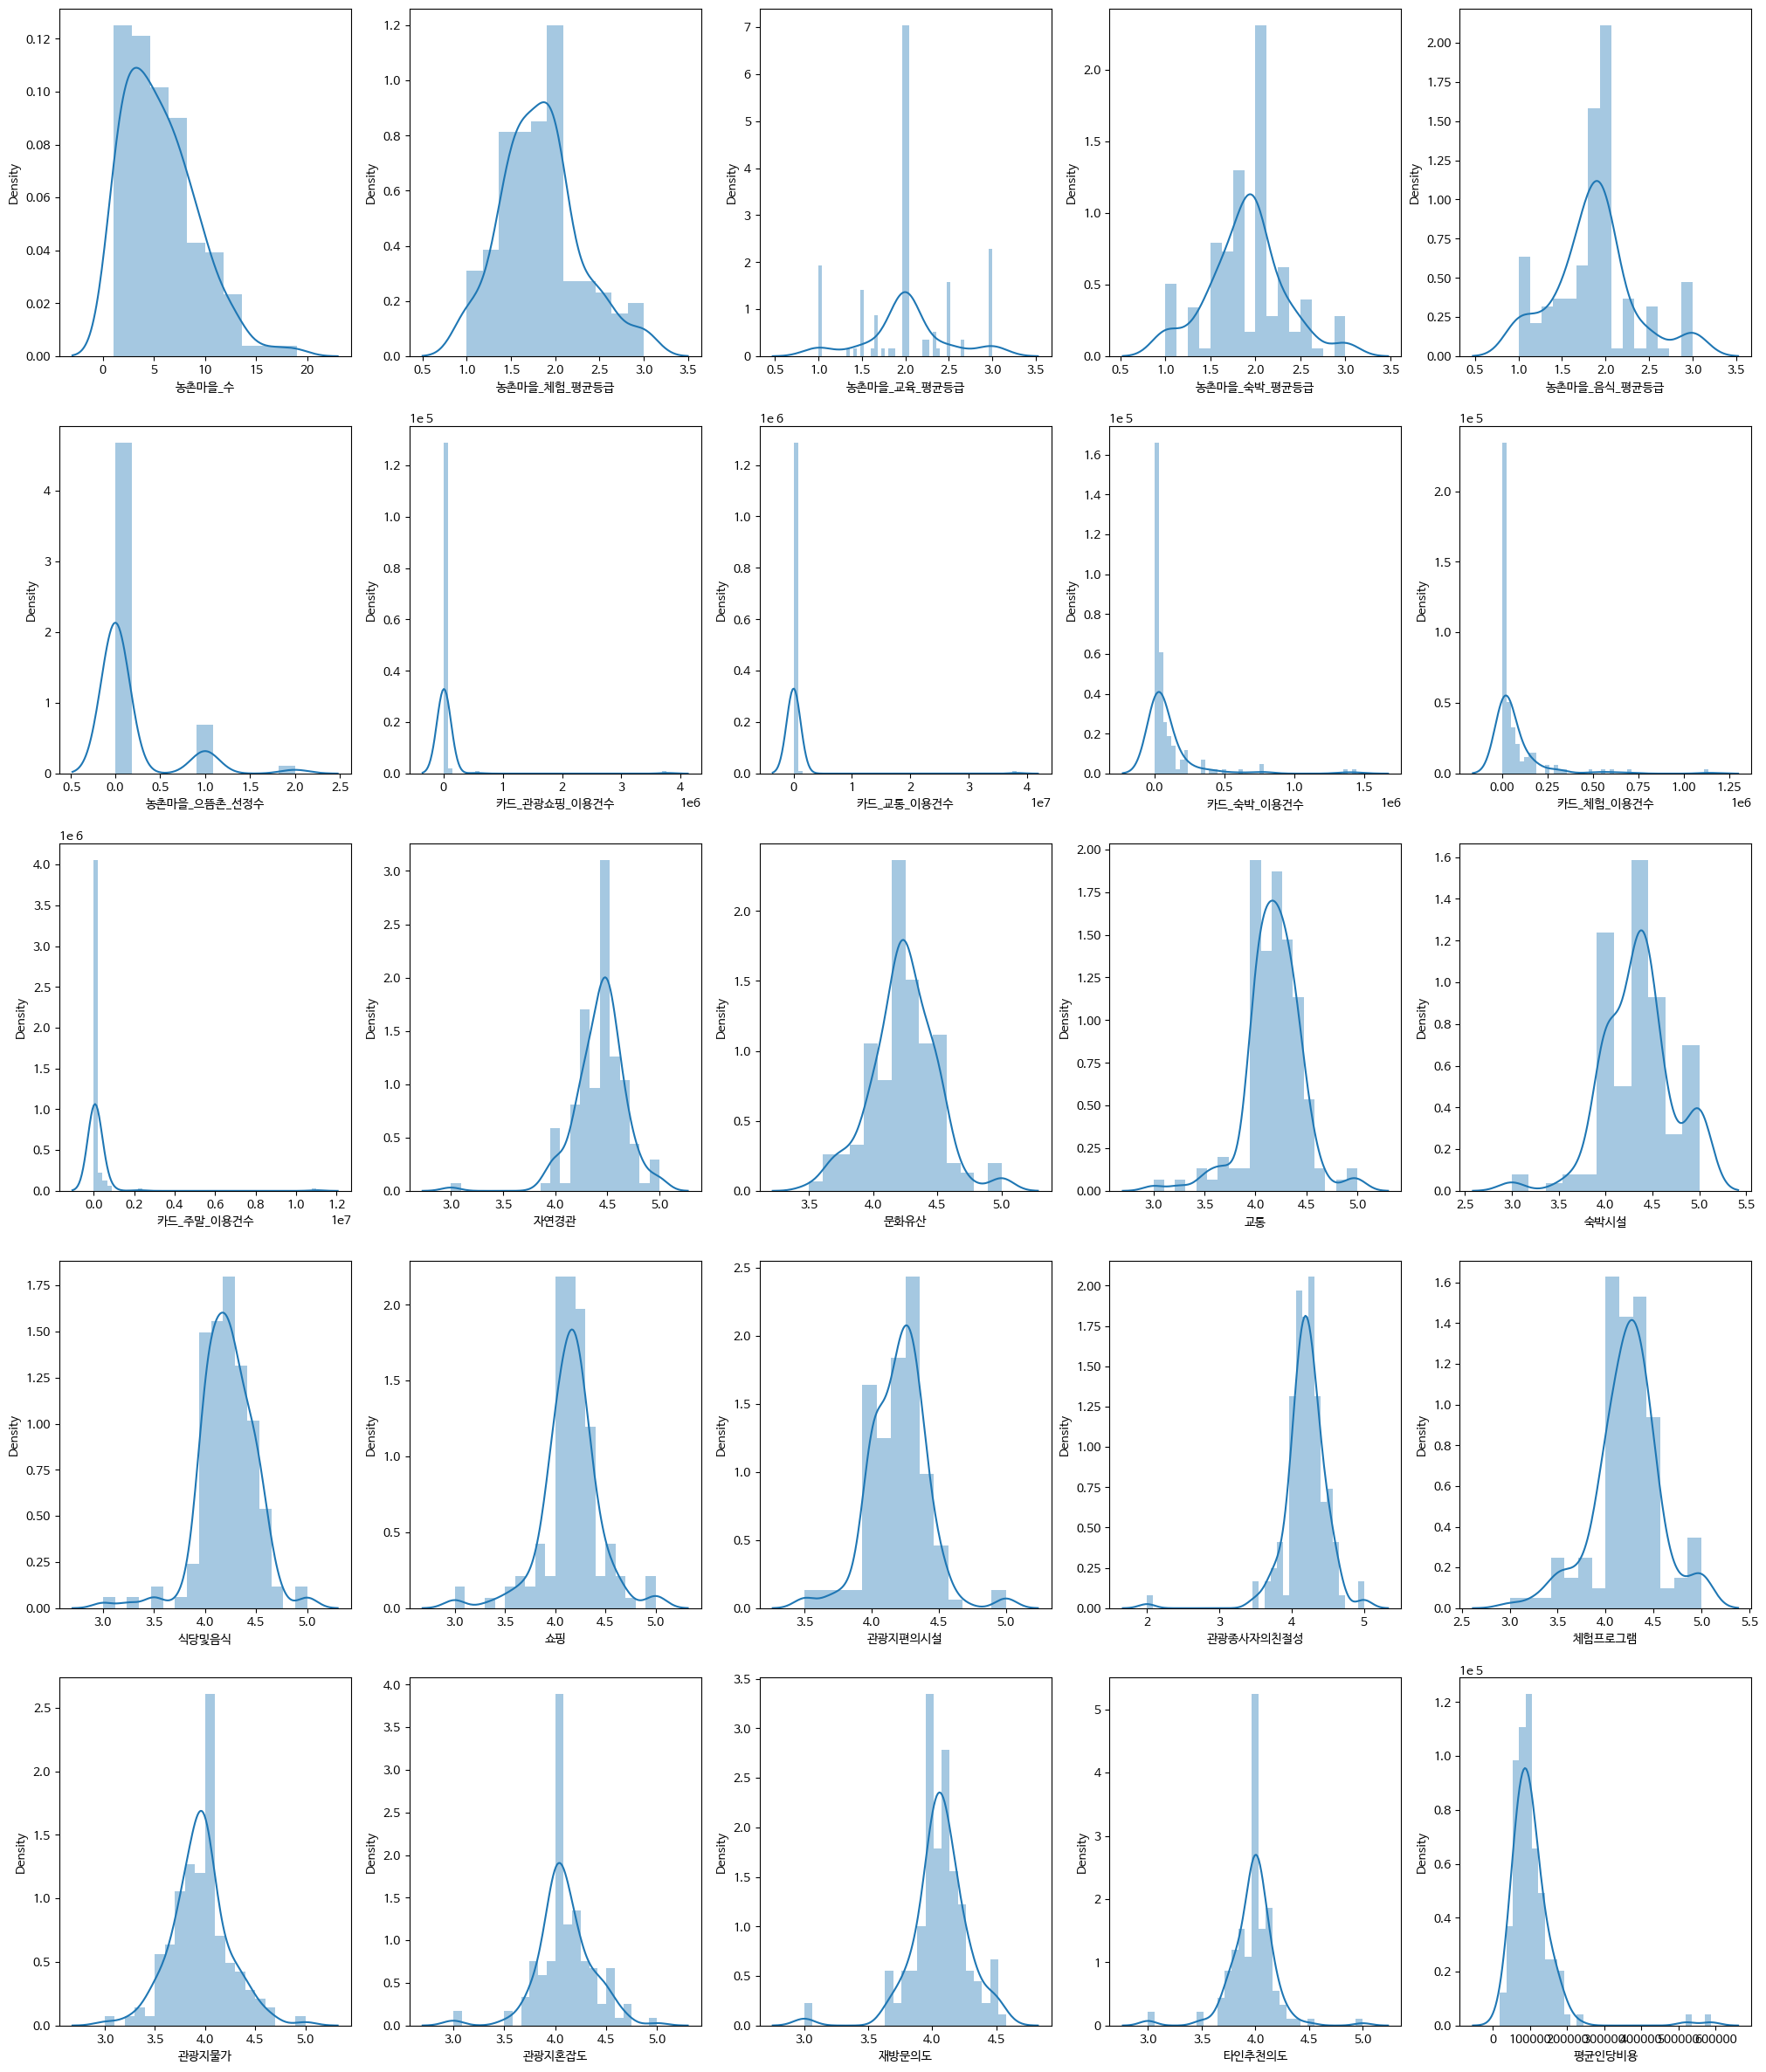

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 30))
columns = df.iloc[:, 1:-1].columns.tolist()

for row in range(6):
    for col in range(5):
      idx = row * 5 + col
      if idx < len(columns):
        ax = axes[row][col]
        sns.distplot(df.iloc[:, idx+1], ax=ax)
plt.show()

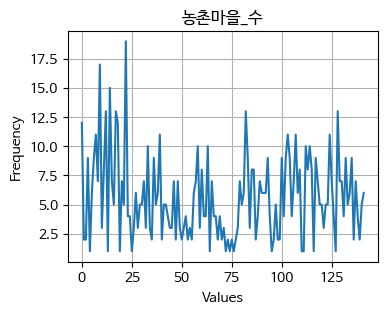

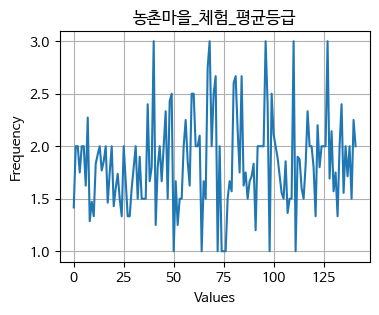

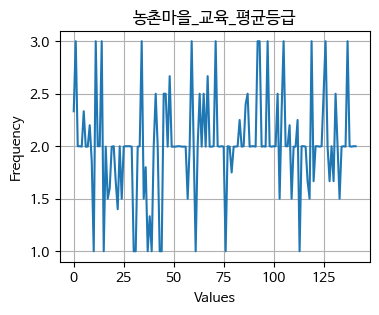

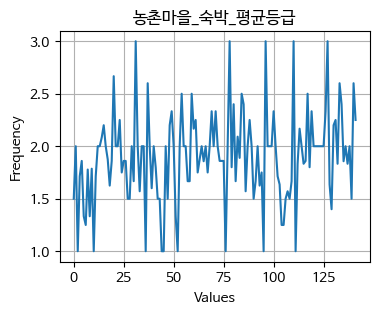

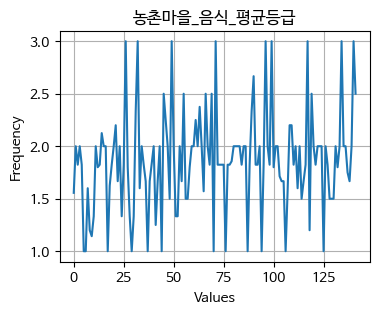

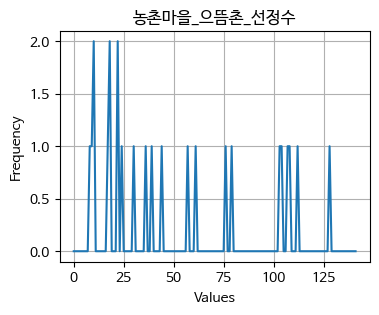

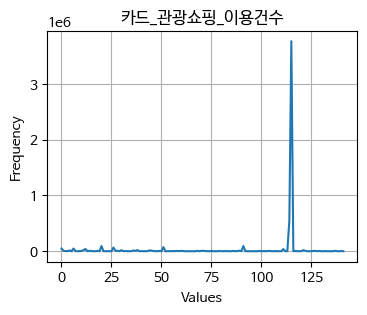

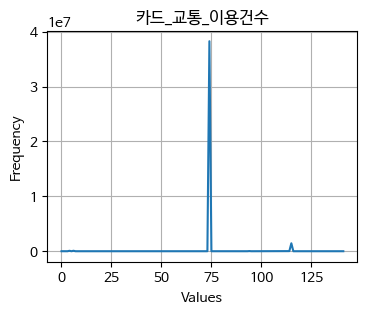

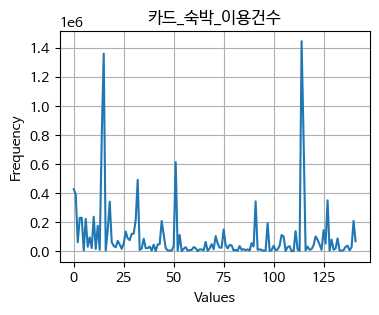

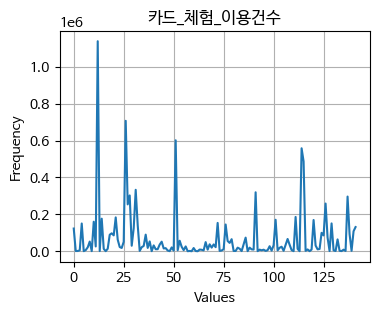

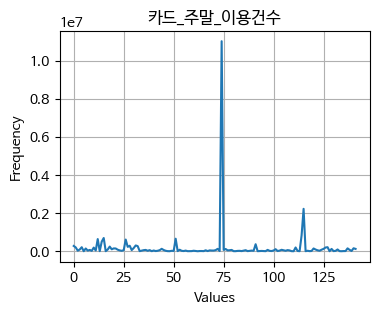

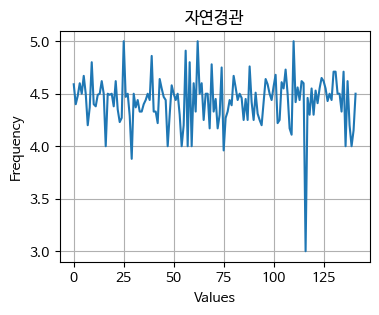

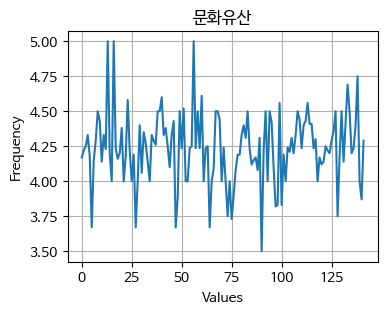

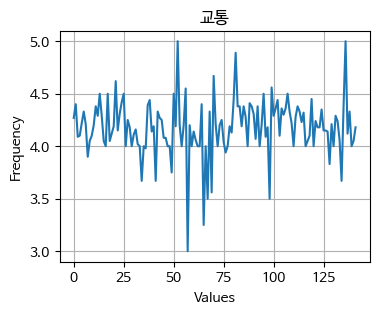

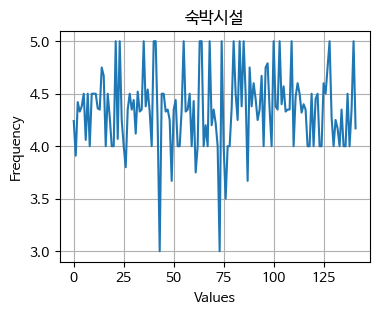

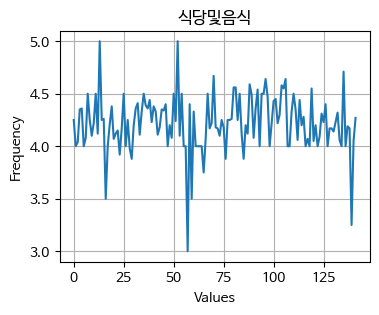

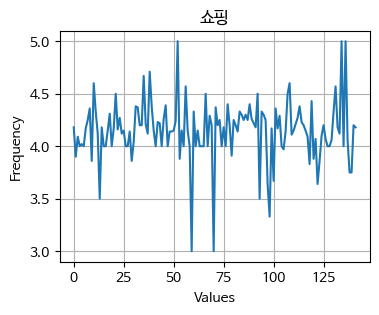

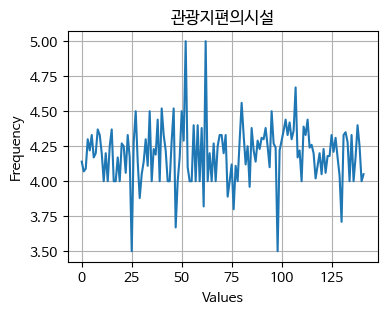

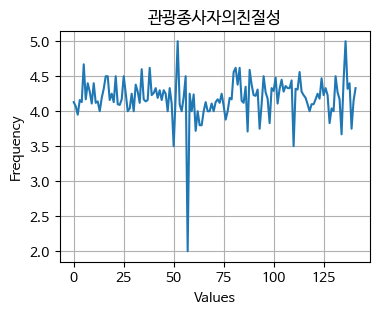

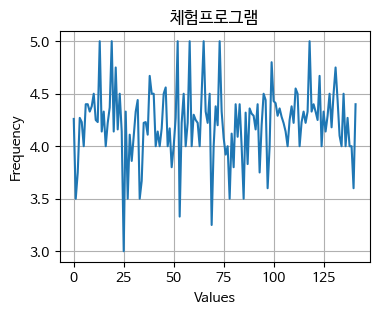

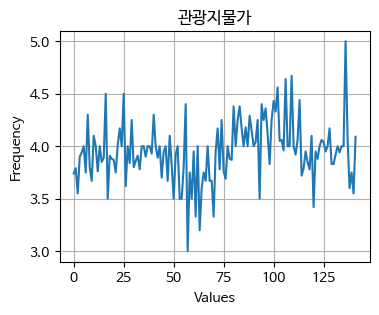

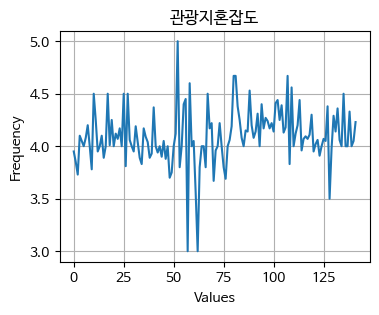

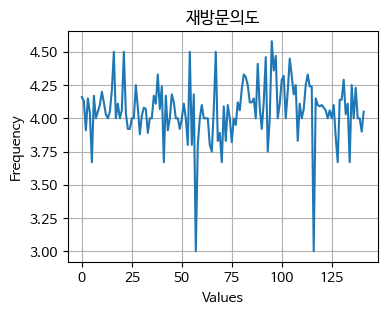

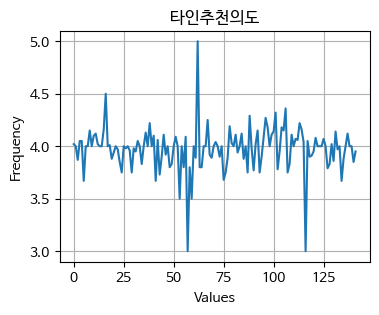

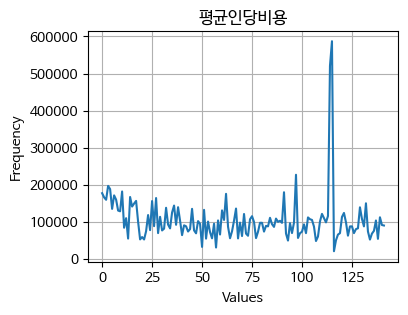

In [15]:
columns = df.iloc[:, 1:-1].columns.tolist()

for i in range(len(columns)):
  plt.figure(figsize=(4, 3))  # Optional: Set the figure size
  plt.plot(df.iloc[:,i+1])  # Adjust the number of bins if needed
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.title(df.columns[i+1])
  plt.grid(True)
  plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      142 non-null    object 
 1   농촌마을_수        142 non-null    int64  
 2   농촌마을_체험_평균등급  142 non-null    float64
 3   농촌마을_교육_평균등급  142 non-null    float64
 4   농촌마을_숙박_평균등급  142 non-null    float64
 5   농촌마을_음식_평균등급  142 non-null    float64
 6   농촌마을_으뜸촌_선정수  142 non-null    int64  
 7   카드_관광쇼핑_이용건수  142 non-null    float64
 8   카드_교통_이용건수    142 non-null    float64
 9   카드_숙박_이용건수    142 non-null    float64
 10  카드_체험_이용건수    142 non-null    float64
 11  카드_주말_이용건수    142 non-null    float64
 12  자연경관          142 non-null    float64
 13  문화유산          142 non-null    float64
 14  교통            142 non-null    float64
 15  숙박시설          142 non-null    float64
 16  식당및음식         142 non-null    float64
 17  쇼핑            142 non-null    float64
 18  관광지편의시설       142 non-null    

#### 편차 큰 컬럼 - 로그변환

In [17]:
# 카드 관련 컬럼 로그변환하기
df_log = df.copy()
df_log.iloc[:, 7:12] = np.log1p(df_log.iloc[:, 7:12])
df_log.iloc[:, -2] = np.log1p(df_log.iloc[:, -2])

#### 평균등급 열에서 0을 평균으로 대체

In [18]:
df_log.iloc[:,2:6][df_log.iloc[:,2:6] == 0].count()

농촌마을_체험_평균등급    0
농촌마을_교육_평균등급    0
농촌마을_숙박_평균등급    0
농촌마을_음식_평균등급    0
dtype: int64

In [19]:
mean_values = df_log.iloc[:,2:6][df_log.iloc[:,2:6] != 0].mean()
mean_values

농촌마을_체험_평균등급    1.837986
농촌마을_교육_평균등급    2.014423
농촌마을_숙박_평균등급    1.899155
농촌마을_음식_평균등급    1.862366
dtype: float64

In [20]:
df_log.iloc[:,2:6] = df_log.iloc[:,2:6].replace(0, mean_values)

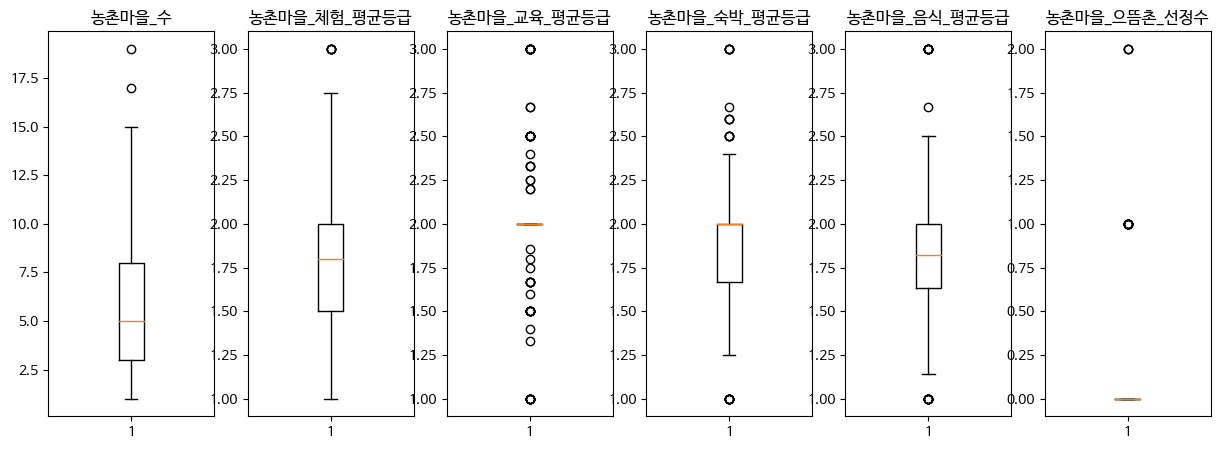

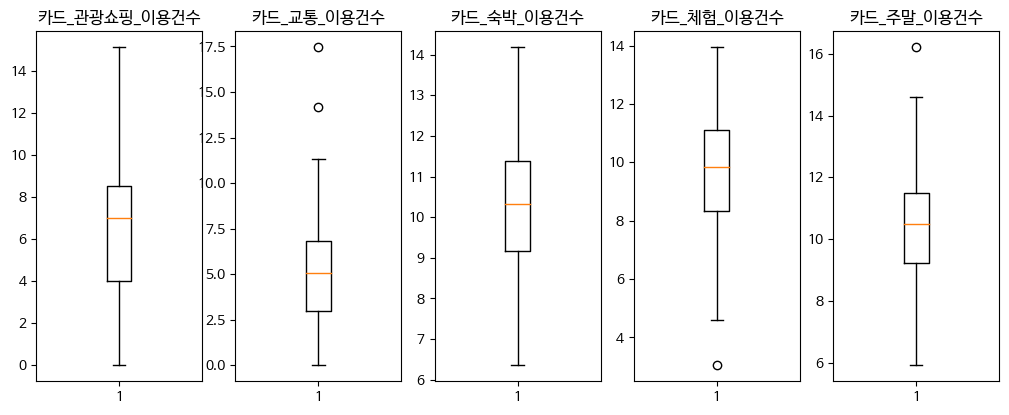

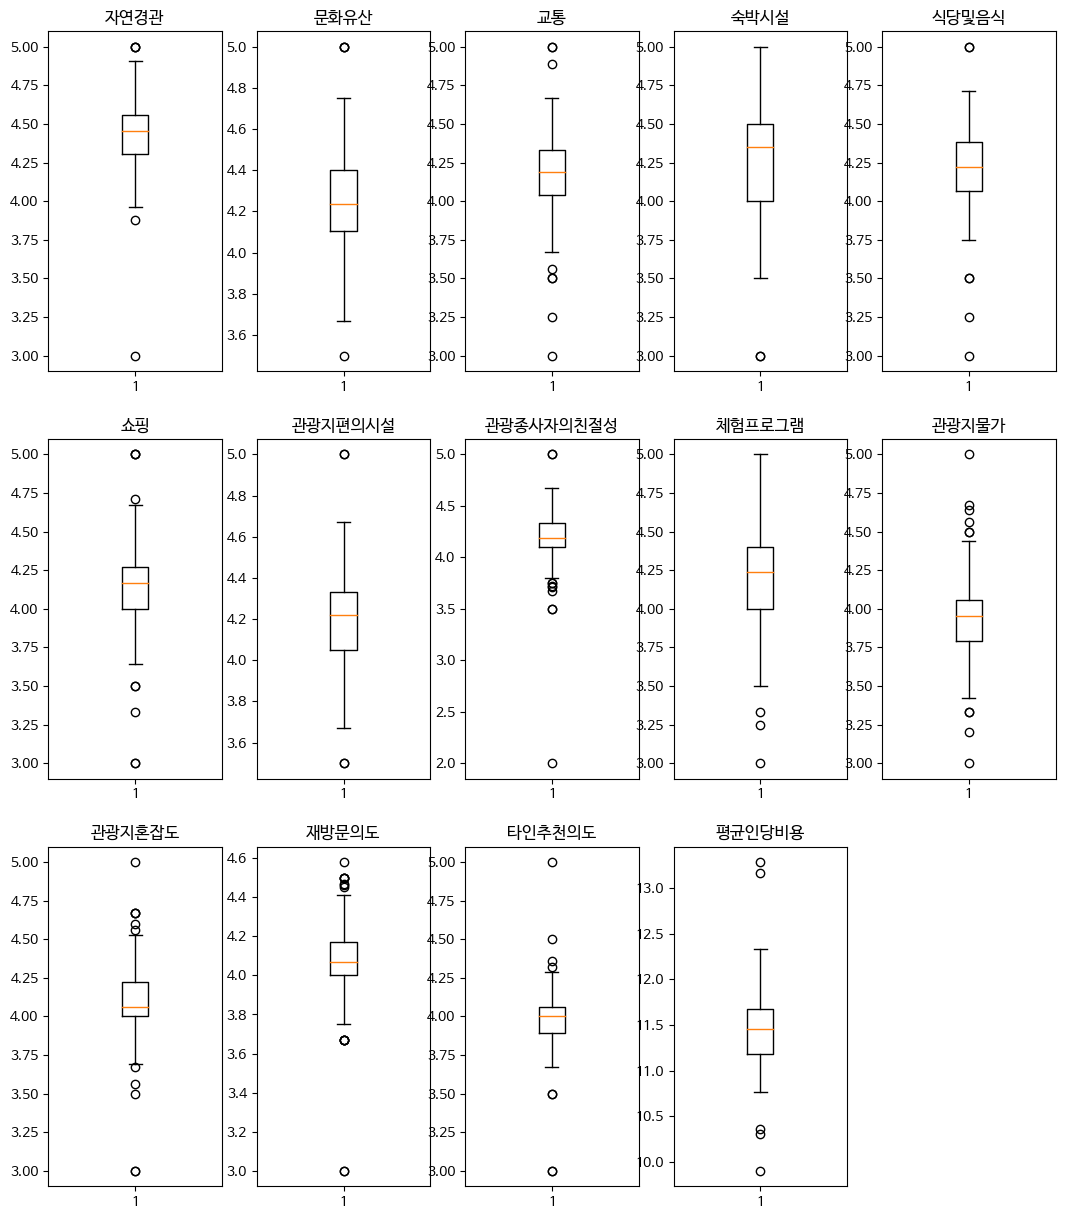

In [21]:
# boxplot
# 변수별 단위 확인
plt.figure(figsize=(15,5))
for i in range(1,7):
  plt.subplot(1,6,i)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

plt.figure(figsize=(15,10))
for i in range(7,12):
  plt.subplot(2,6,i-6)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

plt.figure(figsize=(13,15))
for i in range(12,26):
  plt.subplot(3,5,i-11)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

#### 로그변환 + 모든변수 표준 scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df_scaled = df_log.copy()
scaler = StandardScaler()
df_scaled.iloc[:,1:-1] = scaler.fit_transform(df_scaled.iloc[:,1:-1])

In [24]:
df_scaled

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,1.782666,-0.945201,0.676929,-0.940105,-0.653979,-0.395413,1.366827,0.966730,1.732600,...,0.108042,-0.282214,-0.205684,0.109275,-0.733222,-0.538319,0.441159,0.218108,1.434569,1694153.4
1,강원 고성군,-1.017540,0.363755,2.094203,0.237514,0.293798,-0.395413,0.797889,-0.462439,1.676641,...,-0.873493,-0.611074,-0.406617,-2.103165,-0.559292,-0.911123,0.305271,0.122665,1.285124,165988.0
2,강원 동해시,-1.017540,0.363755,-0.030646,-2.117725,-0.081898,-0.395413,0.460585,0.989713,0.477306,...,-0.207451,-0.517114,-0.808485,-1.375388,-1.394159,-1.358488,-0.691246,-0.497718,1.193624,253243.8
3,강원 삼척시,0.942605,-0.197547,-0.030646,-0.436084,0.293798,-0.395413,0.505949,0.119320,1.330624,...,-0.522945,0.469468,-0.105217,0.138386,-0.176644,0.020888,0.395863,0.361274,1.673464,318245.1
4,강원 속초시,-1.297560,0.363755,-0.039145,-0.092219,-0.081898,-0.395413,0.973560,1.970292,1.330336,...,-0.452835,0.093627,-0.205684,0.021942,-0.037500,-0.165515,-0.102395,0.361274,1.571785,1044555.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,충북 제천시,0.382563,-0.278374,2.094203,-0.155811,-0.239861,-0.395413,0.799832,-0.222993,0.173291,...,-0.312616,-0.141273,0.430606,0.138386,0.449506,-0.351917,0.758233,0.695326,0.214137,317071.0
138,충북 증평군,-0.457498,0.363755,-0.030646,0.237514,-0.417035,-0.395413,-0.499913,0.102723,-0.934330,...,-1.399315,0.939268,0.698517,-0.647612,-1.220228,0.878337,-0.283580,0.122665,-1.269705,43161.0
139,충북 진천군,-1.017540,-0.758849,-0.039145,-0.940105,0.293798,-0.395413,-0.150479,-0.029313,-0.051557,...,-1.399315,0.234567,-1.478263,-0.647612,-0.698436,-0.351917,-0.283580,0.122665,0.397467,55272.9
140,충북 청주시,-0.177478,0.925057,-0.030646,1.650658,2.428430,-0.395413,0.607254,0.995437,1.268844,...,0.178152,-0.939935,-0.138706,-1.812054,-1.394159,-0.165515,-0.736542,-0.593161,-0.071878,150836.1


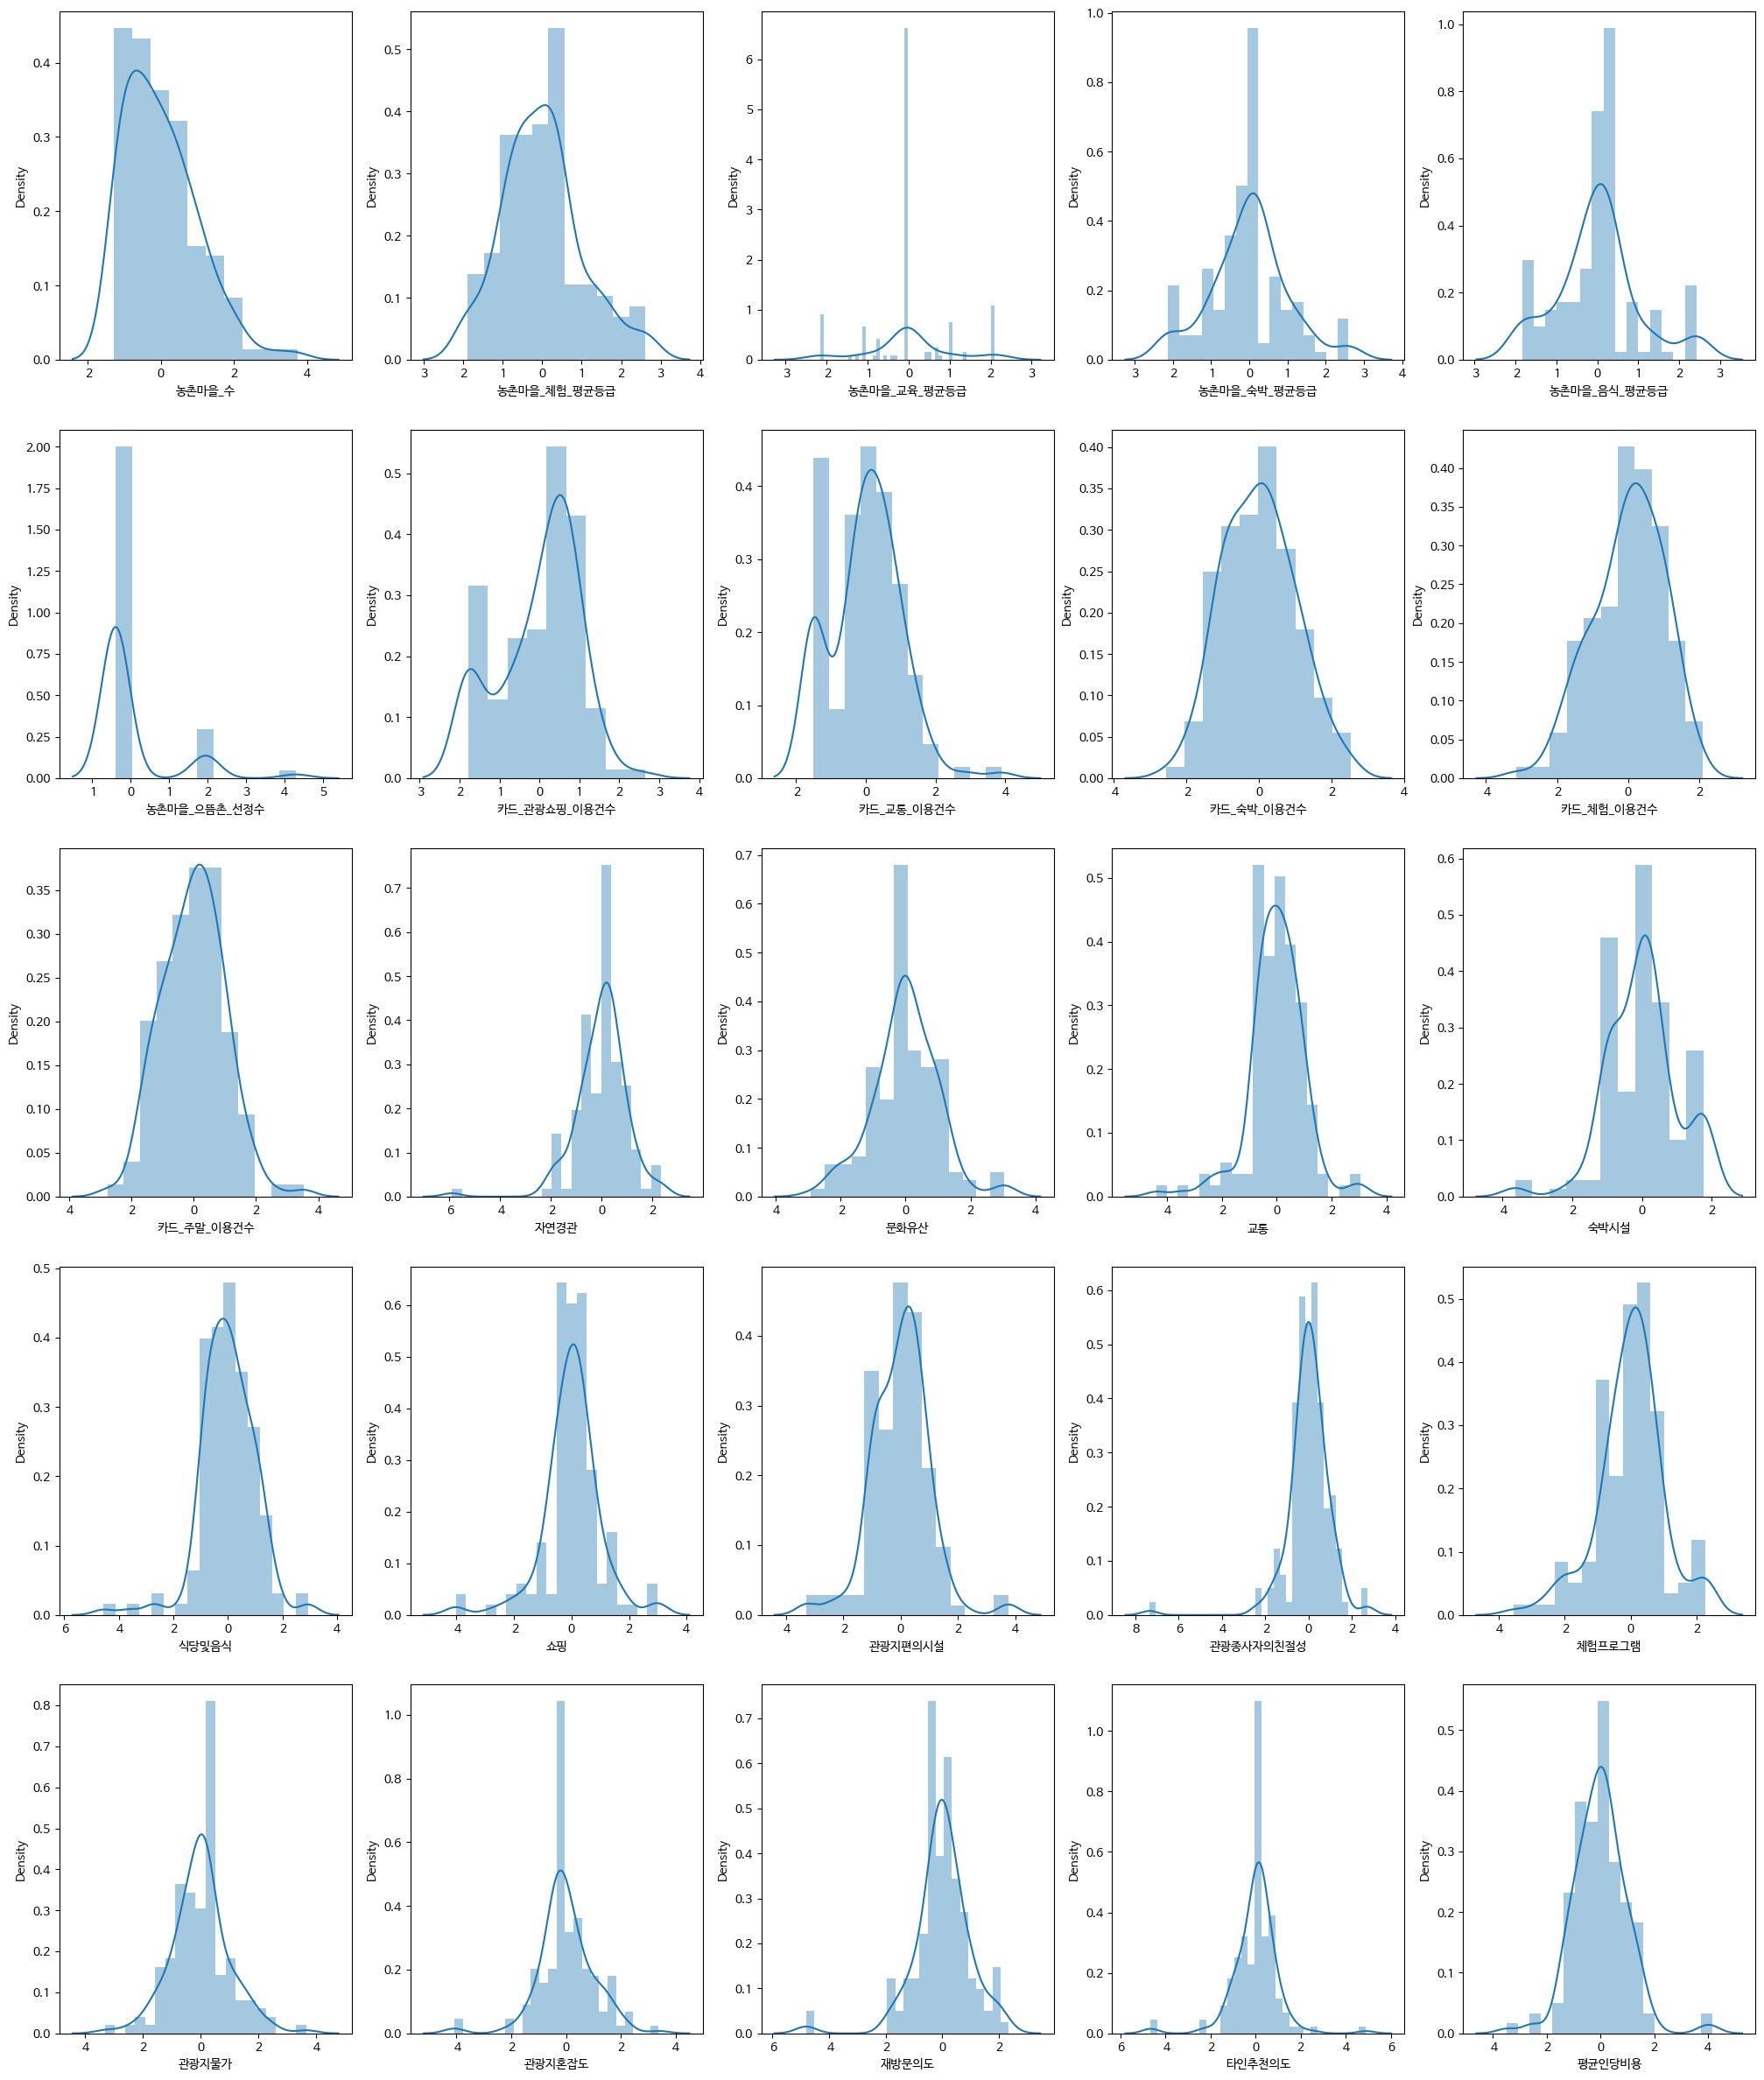

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 30))
columns = df_scaled.iloc[:, 1:-1].columns.tolist()

for row in range(6):
    for col in range(5):
      idx = row * 5 + col
      if idx < len(columns):
        ax = axes[row][col]
        sns.distplot(df_scaled.iloc[:, idx+1], ax=ax)
plt.show()

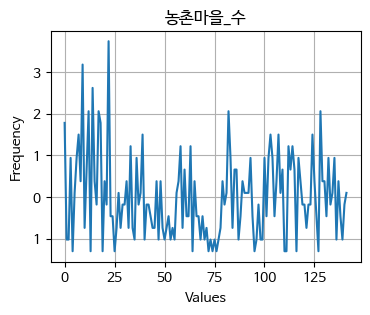

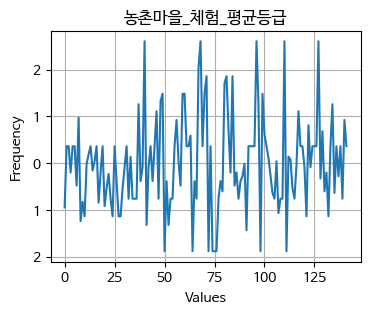

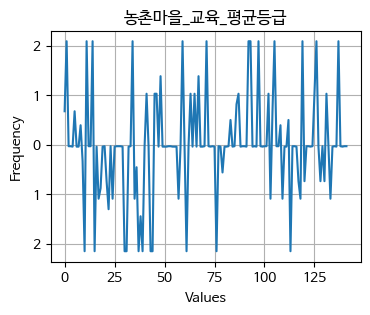

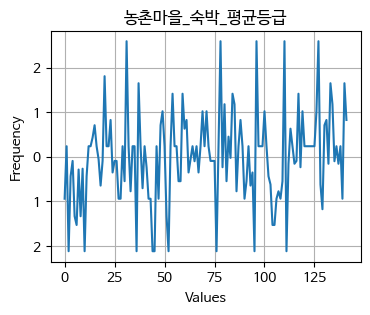

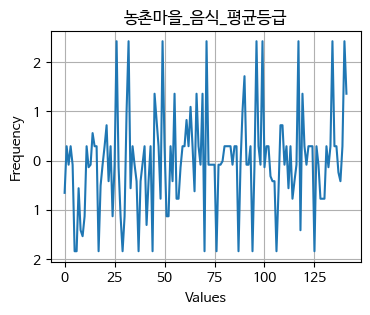

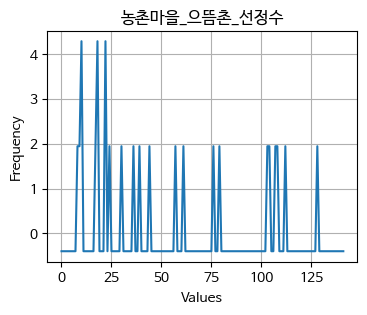

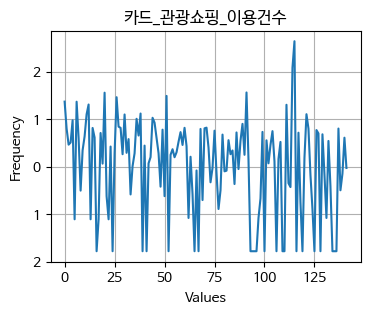

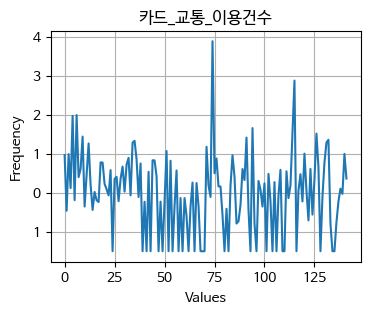

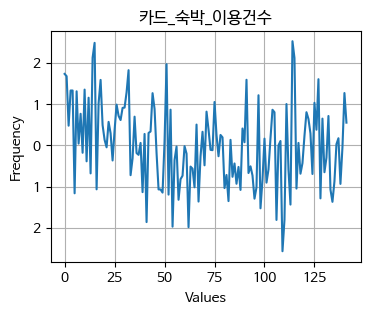

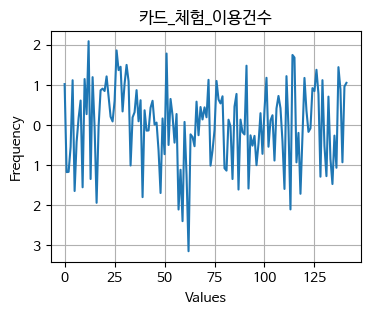

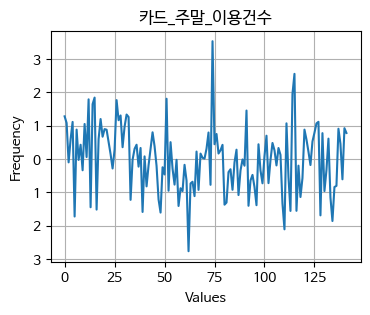

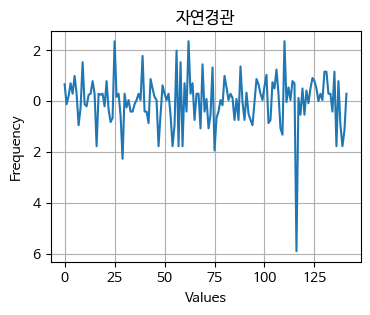

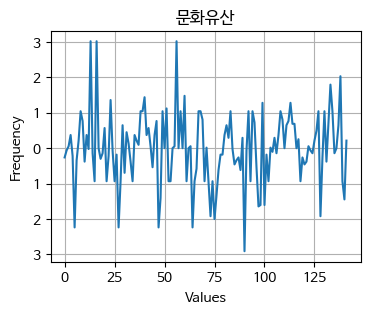

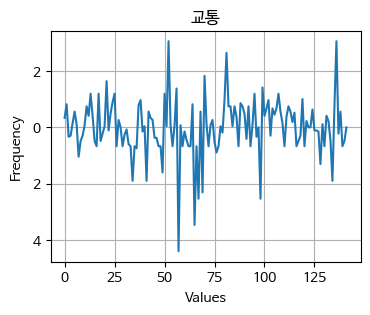

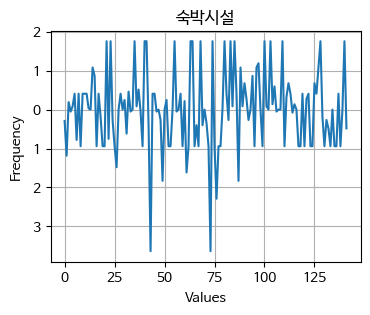

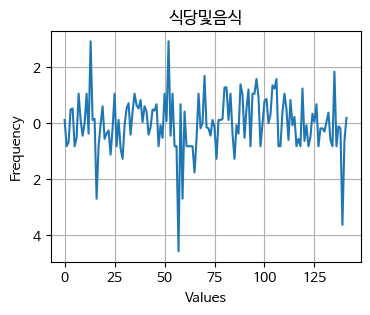

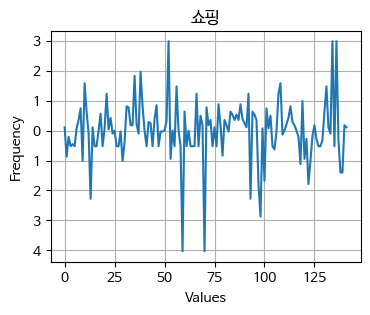

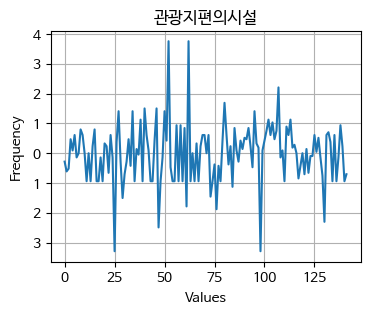

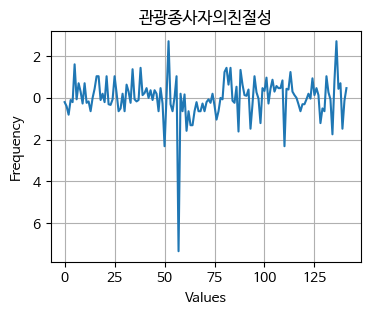

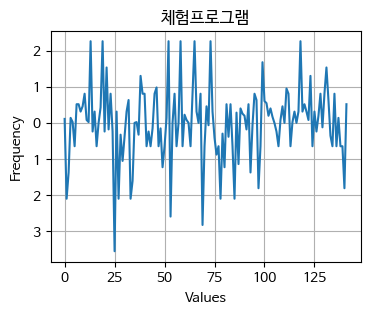

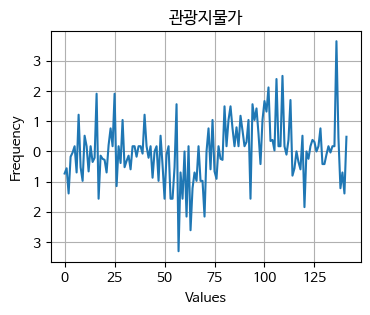

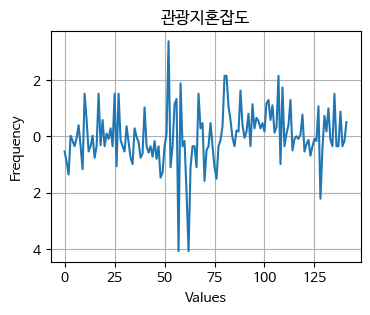

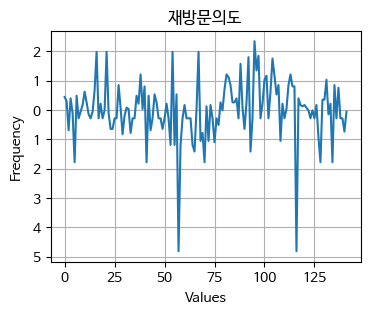

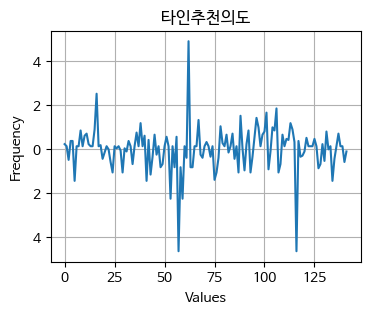

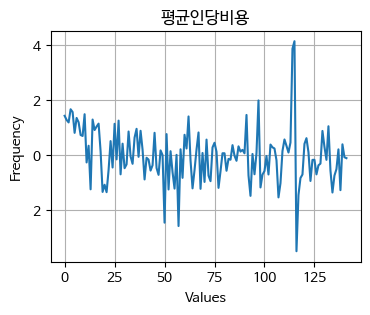

In [26]:
columns = df_scaled.iloc[:, 1:-1].columns.tolist()

for i in range(len(columns)):
  plt.figure(figsize=(4, 3))  # Optional: Set the figure size
  plt.plot(df_scaled.iloc[:,i+1])  # Adjust the number of bins if needed
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.title(df_scaled.columns[i+1])
  plt.grid(True)
  plt.show()

In [27]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
res = ols('여행객수~' + '+'.join(df_scaled.iloc[:, 1:-1].columns), data=df_scaled.iloc[:, 1:]).fit()        ######
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   여행객수   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     5.657
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           4.47e-11
Time:                        14:19:25   Log-Likelihood:                -1949.4
No. Observations:                 142   AIC:                             3951.
Df Residuals:                     116   BIC:                             4028.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.508e+05   2.06e+04     12.178      0.000     2.1e+05    2.92e+05
농촌마을_수         5.98e+04   2.47e+04      2.420      0.017    1.09e+04    1.09e+05
농촌마을_체험_평균등급  9895.7739   2.67e+04      0.370      0.712   -4.31e+04    6.29e+04
농촌마을_교육_평균등급   639.1810   2.41e+04      0.026      0.979   -4.72e+04    4.85e+04
농촌마을_숙박_평균등급 -1310.5686   2.64e+04     -0.050      0.960   -5.35e+04    5.09e+04
농촌마을_음식_평균등급  5202.1472    2.5e+04      0.208      0.836   -4.44e+04    5.48e+04
농촌마을_으뜸촌_선정수  1.784e+04   2.78e+04      0.642      0.522   -3.72e+04    7.29e+04
카드_관광쇼핑_이용건수  3.474e+04   2.99e+04      1.163      0.247   -2.44e+04    9.39e+04
카드_교통_이용건수    2.887e+04   3.03e+04      0.952      0.343   -3.12e+04    8.89e+04
카드_숙박_이용건수    8.585e+04   4.12e+04      2.086      0.039    4323.034    1.67e+05
카드_체험_이용건수    1.144e+05   4.06e+04      2.821      0.006    3.41e+04    1.95e+05
카드_주말_이용건수   -2.025e+04   5.73e+04     -0.353      0.724   -1.34e+05    9.32e+04
자연경관          -2.75e+04   2.72e+04     -1.011      0.314   -8.14e+04    2.64e+04
문화유산          1.062e+04   2.33e+04      0.457      0.649   -3.55e+04    5.67e+04
교통            1.344e+04   2.94e+04      0.457      0.648   -4.48e+04    7.17e+04
숙박시설         -3.819e+04   2.28e+04     -1.674      0.097   -8.34e+04    6987.908
식당및음식         2.844e+04    2.8e+04      1.014      0.312   -2.71e+04     8.4e+04
쇼핑            4222.1264   2.51e+04      0.168      0.867   -4.54e+04    5.39e+04
관광지편의시설       7822.9481   2.52e+04      0.310      0.757   -4.21e+04    5.78e+04
관광종사자의친절성    -6.601e+04   3.37e+04     -1.961      0.052   -1.33e+05     673.532
체험프로그램        3.756e+04   2.34e+04      1.605      0.111   -8797.556    8.39e+04
관광지물가         2.072e+04   3.02e+04      0.686      0.494   -3.91e+04    8.05e+04
관광지혼잡도       -3.129e+04   2.96e+04     -1.058      0.292   -8.99e+04    2.73e+04
재방문의도        -7234.8500   3.52e+04     -0.205      0.838    -7.7e+04    6.26e+04
타인추천의도        2.143e+04   3.68e+04      0.582      0.562   -5.15e+04    9.44e+04
평균인당비용        7.569e+04    3.3e+04      2.296      0.023    1.04e+04    1.41e+05
==============================================================================
Omnibus:                       40.740   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.668
Skew:                           1.206   Prob(JB):                     2.05e-20
Kurtosis:                       6.083   Cond. No.                         7.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_scaled.iloc[:,1:-1].values, i) for i in range(df_scaled.iloc[:,1:-1].shape[1])]
vif['features'] = df_scaled.iloc[:,1:-1].columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.226781,숙박시설
1,1.276673,문화유산
2,1.291819,체험프로그램
3,1.375281,농촌마을_교육_평균등급
4,1.440027,농촌마을_수
5,1.479002,농촌마을_음식_평균등급
6,1.482009,쇼핑
7,1.500550,관광지편의시설
8,1.639654,농촌마을_숙박_평균등급
9,1.687272,농촌마을_체험_평균등급


### 단계별 선택법

In [29]:
## 전진 단계별 선택법
import statsmodels.api as sm
variables = df_scaled.columns[1:-1].tolist() ## 설명 변수 리스트

y = df_scaled['여행객수'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [30]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
    ## 선형 모형을 적합한다.
    for col in remainder:
        X = df_scaled[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df_scaled[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_scaled[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [31]:
selected_variables

['카드_숙박_이용건수', '농촌마을_수', '카드_체험_이용건수', '평균인당비용', '관광종사자의친절성', '체험프로그램']

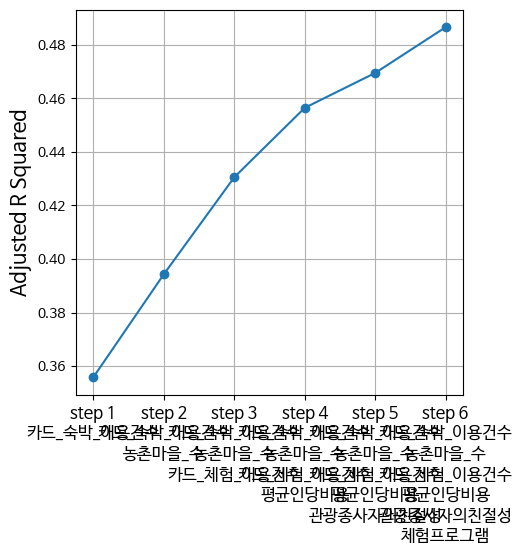

In [32]:
fig = plt.figure(figsize=(5, 5))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

### 최종으로 회귀분석

In [33]:
df_final = df_scaled[selected_variables + ['여행객수']]
df_final

,카드_숙박_이용건수,농촌마을_수,카드_체험_이용건수,평균인당비용,관광종사자의친절성,체험프로그램,여행객수
0,1.732600,1.782666,1.020404,1.434569,-0.205684,0.109275,1694153.4
1,1.676641,-1.017540,-1.178949,1.285124,-0.406617,-2.103165,165988.0
2,0.477306,-1.017540,-1.172570,1.193624,-0.808485,-1.375388,253243.8
3,1.330624,0.942605,-0.548187,1.673464,-0.105217,0.138386,318245.1
4,1.330336,-1.297560,1.116949,1.571785,-0.205684,0.021942,1044555.1
...,...,...,...,...,...,...,...
137,0.173291,0.382563,1.443514,0.214137,0.430606,0.138386,317071.0
138,-0.934330,-0.457498,0.886814,-1.269705,0.698517,-0.647612,43161.0
139,-0.051557,-1.017540,-0.932969,0.397467,-1.478263,-0.647612,55272.9
140,1.268844,-0.177478,0.959341,-0.071878,-0.138706,-1.812054,150836.1


In [34]:
res = ols('여행객수~' + '+'.join(df_final.iloc[:, :-1].columns), data=df_final).fit()        ######
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   여행객수   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           9.55e-19
Time:                        14:19:27   Log-Likelihood:                -1955.6
No. Observations:                 142   AIC:                             3925.
Df Residuals:                     135   BIC:                             3946.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.508e+05   1.99e+04     12.579      0.000    2.11e+05     2.9e+05
카드_숙박_이용건수  1.015e+05   2.76e+04      3.672      0.000    4.68e+04    1.56e+05
농촌마을_수      5.059e+04   2.05e+04      2.463      0.015    9970.822    9.12e+04
카드_체험_이용건수   1.06e+05   2.53e+04      4.189      0.000    5.59e+04    1.56e+05
평균인당비용      8.693e+04   2.41e+04      3.603      0.000    3.92e+04    1.35e+05
관광종사자의친절성   -5.28e+04   2.12e+04     -2.488      0.014   -9.48e+04   -1.08e+04
체험프로그램      4.839e+04   2.06e+04      2.352      0.020    7700.552    8.91e+04
==============================================================================
Omnibus:                       40.396   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.310
Skew:                           1.182   Prob(JB):                     9.02e-21
Kurtosis:                       6.164   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
selected_variables.sort()
selected_variables

['관광종사자의친절성', '농촌마을_수', '체험프로그램', '카드_숙박_이용건수', '카드_체험_이용건수', '평균인당비용']